# 1-Classification-Kalp Hastalığı Tahmini

<img src="heart.jfif">

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings 
warnings.simplefilter("ignore")

Kalp hastalığı sınıflandırma projesi, önemli bir sağlık sorununu ele alacak ve veri bilimi yöntemlerini kullanarak hastaların kalp hastalığı riskini tahmin etmeye odaklanacak bir projedir. İşte bu proje için adım adım yapmanız gerekenler:

**1. Veri Toplama:**
   - İlk adım, bu projede kullanmak için uygun veri kaynaklarını belirlemektir. Genellikle hastane kayıtları, sağlık kurumlarının veritabanları veya kamu sağlık verileri bu tür projeler için kullanılabilir.
   - Veri toplama aşamasında, hastaların yaşları, cinsiyetleri, kan basıncı, kolestrol seviyeleri, kan şekeri düzeyleri, aile öyküsü gibi potansiyel risk faktörlerini içeren verileri toplamalısınız. Ayrıca, kalp hastalığı teşhisi konulan veya konulmayan hastaların etiketli verilerini de toplamalısınız.

**2. Veri Hazırlama ve Temizleme:**
   - Topladığınız verileri analiz için hazırlamalısınız. Bu aşamada eksik verileri doldurmalı, gereksiz sütunları kaldırmalı ve verileri normalize etmelisiniz.
   - Ayrıca, verilerinizi eğitim ve test verisi olarak bölmelisiniz. Bu, modelinizin performansını objektif bir şekilde değerlendirmenize yardımcı olur.

**3. Özellik Mühendisliği:**
   - Verilerinizi daha iyi temsil etmek ve modelinizin performansını artırmak için özellik mühendisliği yapmalısınız. Özelliklerinizi seçmeli veya yeni özellikler türetebilirsiniz.

**4. Model Seçimi:**
   - Makine öğrenimi modeli seçmelisiniz. Kalp hastalığı sınıflandırma için sık kullanılan modeller arasında karar ağaçları, rastgele ormanlar, destek vektör makineleri veya yapay sinir ağları bulunur.

**5. Model Eğitimi:**
   - Seçtiğiniz modeli eğitmeye başlayın. Eğitim verilerinizi kullanarak modelinizi öğretin ve belirli bir metrik (örneğin, doğruluk) üzerinde optimize edin.

**6. Model Değerlendirmesi:**
   - Eğitilen modelinizi test verisi üzerinde değerlendirin. Doğruluk, hassasiyet, özgüllük, duyarlılık gibi metriklerle modelin performansını değerlendirin.

**7. Sonuçları Sunma:**
   - Projedeki sonuçları ve bulguları etkili bir şekilde sunun. Bir rapor veya sunum hazırlayarak bulgularınızı paylaşın.

## Veri Okuma ve Analizi

In [4]:
df=pd.read_csv("heart.csv")

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


1. **age:** Hastanın yaşı.
2. **sex:** Cinsiyet (1: Erkek, 0: Kadın).
3. **cp:** Göğüs ağrısı tipi (muhtemelen kategorik bir değişken).
4. **trestbps:** Dinlenme kan basıncı.
5. **chol:** Kolesterol seviyeleri.
6. **fbs:** Açlık kan şekeri seviyesi (1: Yüksek, 0: Normal).
7. **restecg:** Dinlenme elektrokardiyogram sonuçları (muhtemelen kategorik bir değişken).
8. **thalach:** Maximum kalp atış hızı.
9. **exang:** Egzersizle tetiklenen anjina (1: Evet, 0: Hayır).
10. **oldpeak:** Dinlenme ile egzersiz arasındaki ST segmentinin depresyonu ile ölçülen bir değişken.
11. **slope:** ST segmentinin eğimi.
12. **ca:** Ana damar sayısı .
13. **thal:** Talasemi türü .
14. **target:** Hedef değişkeni, kalp hastalığı varsa 1, yoksa 0.

In [6]:
df.shape # veri sayımız az

(303, 14)

In [7]:
df.describe() 
# yaş-29-77

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Veri Görselleştirmesi 

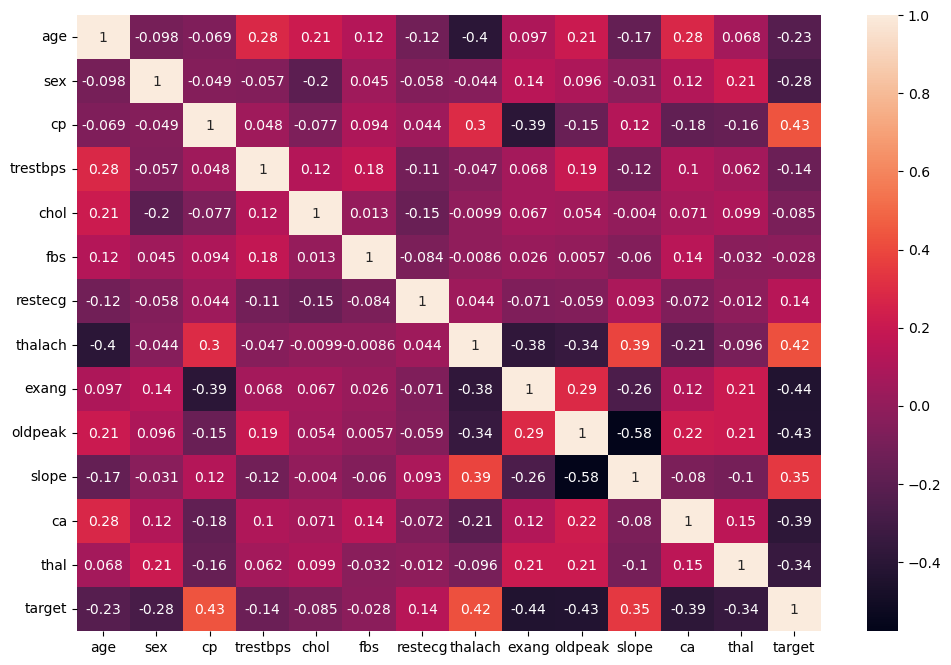

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True);

In [12]:
df.corr()['age'].sort_values(ascending=False)

age         1.000000
trestbps    0.279351
ca          0.276326
chol        0.213678
oldpeak     0.210013
fbs         0.121308
exang       0.096801
thal        0.068001
cp         -0.068653
sex        -0.098447
restecg    -0.116211
slope      -0.168814
target     -0.225439
thalach    -0.398522
Name: age, dtype: float64

Trestbps: Dinlenme kan basıncı (trestbps) ile yaş arasında pozitif bir korelasyon (0.279) vardır. Bu, yaşın artmasıyla dinlenme kan basıncının da artabileceğini gösterir.

Ca: Ana damar sayısı (ca) ile yaş arasında pozitif bir korelasyon (0.276) bulunmaktadır. Bu, yaşın artmasıyla ana damar sayısının da artabileceğini gösterir.

Chol: Kolesterol seviyeleri (chol) ile yaş arasında pozitif bir korelasyon (0.214) vardır. Yaşın artmasıyla kolesterol seviyelerinin artabileceğini gösterir.

Oldpeak: Dinlenme ile egzersiz arasındaki ST segmentinin depresyonu (oldpeak) ile yaş arasında pozitif bir korelasyon (0.210) vardır.

Fbs: Açlık kan şekeri seviyeleri (fbs) ile yaş arasında pozitif bir korelasyon (0.121) vardır.

Exang: Egzersizle tetiklenen anjina (exang) ile yaş arasında pozitif bir korelasyon (0.097) vardır.

Thal: Talasemi türü (thal) ile yaş arasında pozitif bir korelasyon (0.068) bulunur.

Cp: Göğüs ağrısı tipi (cp) ile yaş arasında negatif bir korelasyon (-0.069) vardır.

Sex: Cinsiyet (sex) ile yaş arasında negatif bir korelasyon (-0.098) bulunur.

Restecg: Dinlenme elektrokardiyogram sonuçları (restecg) ile yaş arasında negatif bir korelasyon (-0.116) vardır.

Slope: ST segmentinin eğimi (slope) ile yaş arasında negatif bir korelasyon (-0.169) vardır.

Target: Hedef değişkeni (target) ile yaş arasında negatif bir korelasyon (-0.225) bulunur. Bu, yaşın artmasıyla kalp hastalığı riskinin azaldığını gösterebilir.

Thalach: Maximum kalp atış hızı (thalach) ile yaş arasında negatif bir korelasyon (-0.399) vardır. Bu, yaşın artmasıyla maksimum kalp atış hızının azaldığını gösterebilir.

Bu korelasyonlar, yaş değişkeni ile diğer değişkenler arasındaki ilişkiyi ölçer. Ancak unutmayın ki korelasyon nedensel bir ilişkiyi belirtmez, yalnızca değişkenler arasındaki ilişkiyi gösterir.

In [14]:
df.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

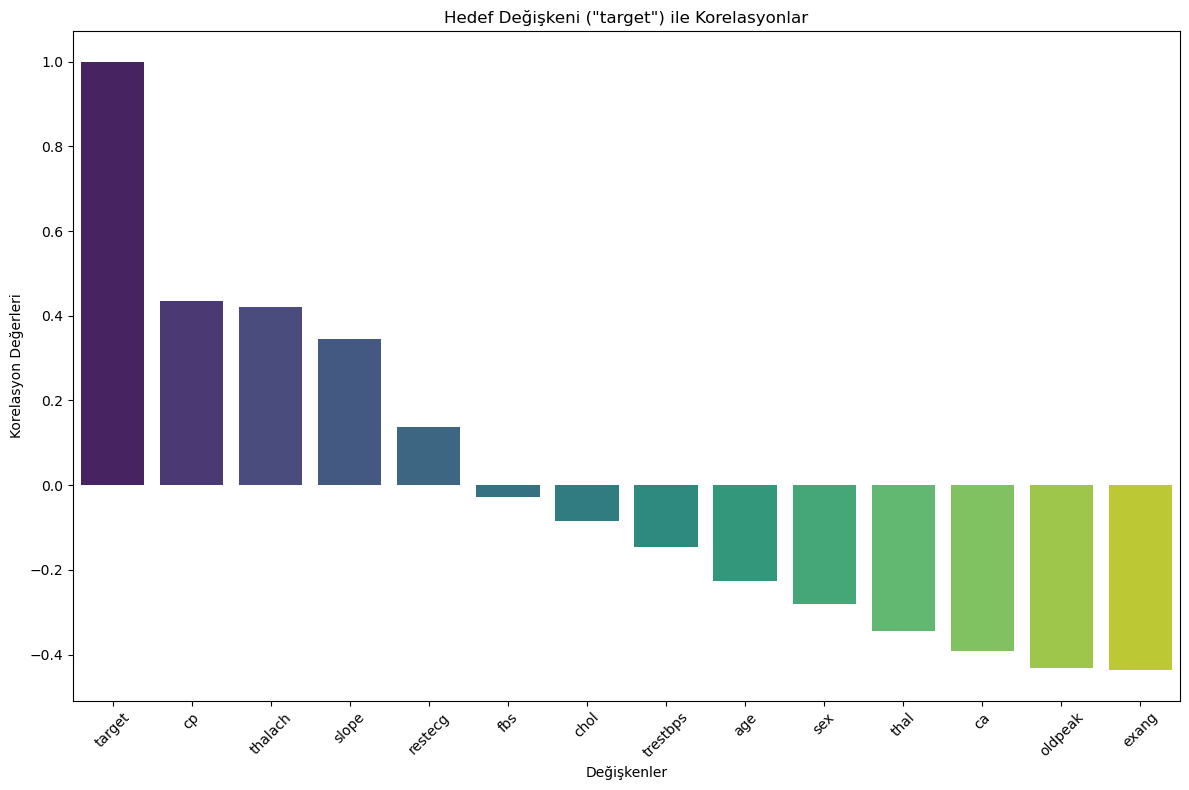

In [15]:
# Hedef değişkeni ("target") ile diğer özellikler arasındaki korelasyonları sıralayın
correlations_with_target = df.corr()['target'].sort_values(ascending=False)

# Grafiği oluşturun
plt.figure(figsize=(12, 8))
sns.barplot(x=correlations_with_target.index, y=correlations_with_target.values, palette="viridis")
plt.title('Hedef Değişkeni ("target") ile Korelasyonlar')
plt.xlabel('Değişkenler')
plt.ylabel('Korelasyon Değerleri')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Bu sonuçlar, hedef değişkeni ("target") ile diğer dört özellik (cp, thalach, slope, restecg) arasındaki Pearson korelasyonlarını temsil ediyor. İşte bu korelasyonların yorumları:
1. **cp (Göğüs Ağrısı Tipi):**
   - Korelasyon Değeri: 0.433798
   - Yorum: Göğüs ağrısı tipi (cp) ile hedef değişkeni arasında pozitif bir korelasyon vardır. Bu, belirli göğüs ağrısı tiplerinin (örneğin, tip 1 veya tip 2) kalp hastalığının varlığına işaret edebileceğini gösterir. Yani, belirli bir göğüs ağrısı tipine sahip olan hastaların kalp hastalığına yakalanma olasılığı daha yüksek olabilir.

2. **thalach (Maximum Kalp Atış Hızı):**
   - Korelasyon Değeri: 0.421741
   - Yorum: Maximum kalp atış hızı (thalach) ile hedef değişkeni arasında pozitif bir korelasyon vardır. Bu, daha yüksek bir maksimum kalp atış hızına sahip hastaların kalp hastalığına yakalanma olasılığının artabileceğini gösterir.

3. **slope (ST Segmentinin Eğimi):**
   - Korelasyon Değeri: 0.345877
   - Yorum: ST segmentinin eğimi (slope) ile hedef değişkeni arasında pozitif bir korelasyon vardır. Bu, belirli bir ST segmenti eğimine sahip olan hastaların kalp hastalığı riskinin artabileceğini gösterir.

4. **restecg (Dinlenme Elektrokardiyogram Sonuçları):**
   - Korelasyon Değeri: 0.137230
   - Yorum: Dinlenme elektrokardiyogram sonuçları (restecg) ile hedef değişkeni arasında daha düşük bir pozitif korelasyon bulunur. Bu, dinlenme elektrokardiyogram sonuçlarının kalp hastalığına olan etkisinin daha zayıf olduğunu gösterir. Yani, bu özellik hedef değişkeni ile diğer üç özelliğe kıyasla daha az ilişkilidir.


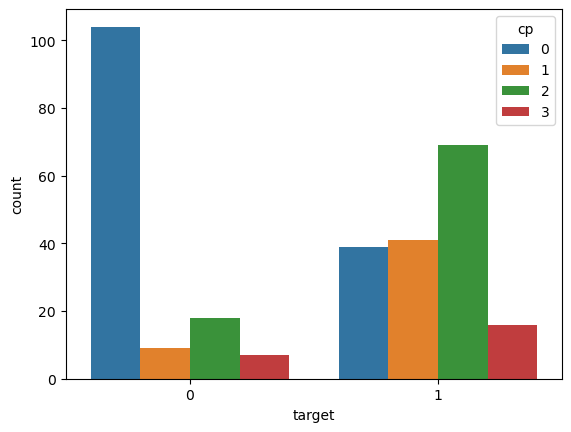

In [16]:
sns.countplot(data=df,x="target",hue="cp");

Mavi Çubuklar (cp=0): Göğüs ağrısı tipi "tip 0" ise (muhtemelen belirli bir nedeni olmayan tip), kalp hastalığı yokluğu (target=0) daha yaygındır. Ancak, bu tipin "kalp hastalığı varlığı" (target=1) ile de ilişkilendirildiği bazı örnekler vardır.

Turuncu Çubuklar (cp=1): Göğüs ağrısı tipi "tip 1" ise (genellikle tipik anjinayı temsil eder), kalp hastalığı varlığı (target=1) daha yaygındır.

Yeşil Çubuklar (cp=2): Göğüs ağrısı tipi "tip 2" ise (genellikle atipik anjinayı temsil eder), kalp hastalığı varlığı (target=1) daha yaygındır.

Kırmızı Çubuklar (cp=3): Göğüs ağrısı tipi "tip 3" ise (genellikle asemptomatik durumu temsil eder), kalp hastalığı varlığı (target=1) daha yaygındır.

Bu grafik, belirli göğüs ağrısı tiplerinin ve kalp hastalığı varlığı arasındaki ilişkiyi gösteriyor. Özellikle "tip 1" göğüs ağrısı olan hastaların kalp hastalığına yakalanma olasılığı daha yüksek gibi görünüyor. Bu tür grafikler, veri seti içindeki değişkenlerin ilişkilerini görsel olarak anlamak için kullanışlıdır ve modelleme sürecinde de rehberlik edebilir.

## Veri Modelleme

In [22]:
def fnc_all_classification_models(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier 
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
    from sklearn.model_selection import train_test_split
   
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    
    algos=[g,b,KN,SVC,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
   
    accuracy_scored=[]

    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
       
    result=pd.DataFrame(columns=['accuracy_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [23]:
y=df[["target"]]

In [24]:
class_model=df.drop(["target"],axis=1)

In [25]:
x=pd.get_dummies(class_model,drop_first=True)

In [26]:
fnc_all_classification_models(x,y)

,accuracy_score
LogisticRegression,0.885246
GaussianNB,0.868852
BernoulliNB,0.868852
RandomForestClassifier,0.852459
DecisionTreeClassifier,0.819672
XGBClassifier,0.819672
SVC,0.704918
KNeighborsClassifier,0.688525


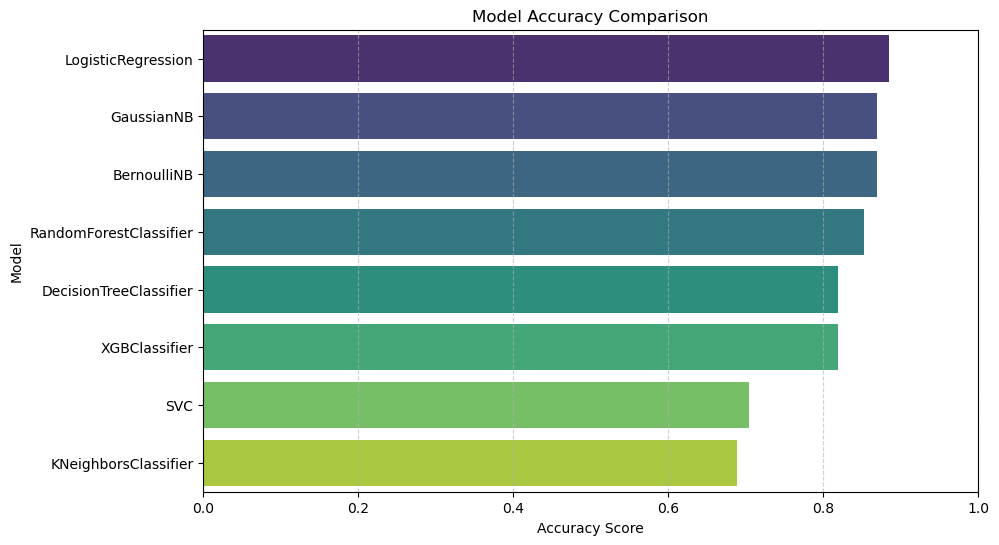

In [27]:
# Sınıflandırma modelleri ve doğruluk skorlarını tanımlayın
models = ["LogisticRegression", "GaussianNB", "BernoulliNB", "RandomForestClassifier", "DecisionTreeClassifier", "XGBClassifier", "SVC", "KNeighborsClassifier"]
accuracy_scores = [0.885246, 0.868852, 0.868852, 0.852459, 0.819672, 0.819672, 0.704918, 0.688525]

# Çubuk grafik oluşturun
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_scores, y=models, palette="viridis")
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)  # X ekseni sınırlarını ayarlayın
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

### Çapraz Doğrulama (Cross-Validation): 
K-Fold çapraz doğrulama yöntemini kullanarak bir modeli doğrulamak için aşağıdaki gibi bir kod örneği kullanabilirsiniz. Bu örnekte, veriyi 5 katlı çapraz doğrulama ile doğruluyoruz:

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier  # Örnek bir sınıflandırma modeli

# Veriyi ve hedef değişkeni yükleyin (X ve y olarak adlandırıldığını varsayalım)
X = df.drop("target", axis=1)
y = df["target"]

# Modelinizi oluşturun (örneğin, RandomForestClassifier kullanalım)
model = RandomForestClassifier()

# K-Fold çapraz doğrulama yapın (5 katlı çapraz doğrulama)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf)

# Doğrulama sonuçlarını yazdırın
print("Çapraz Doğrulama Sonuçları:")
print(scores)
print(f"Ortalama Doğruluk: {scores.mean()}")

Çapraz Doğrulama Sonuçları:
[0.86885246 0.78688525 0.83606557 0.73333333 0.81666667]
Ortalama Doğruluk: 0.8083606557377049


### Hiperparametre Ayarlama (Grid Search):
Şimdi, veri çerçevesi üzerinde hiperparametre ayarlama yapalım:
Bu kod örneğinde, veri çerçevesi üzerinde RandomForestClassifier için farklı hiperparametre kombinasyonlarını aramak için GridSearchCV kullanılır. Sonunda, en iyi hiperparametreleri ve en iyi modeli görüntüleyebilirsiniz.

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier  # Örnek bir sınıflandırma modeli

# Veriyi ve hedef değişkeni yükleyin (X ve y olarak adlandırıldığını varsayalım)
X = df.drop("target", axis=1)
y = df["target"]

# Hiperparametre aralığını belirtin
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Modelinizi oluşturun (örneğin, RandomForestClassifier kullanalım)
model = RandomForestClassifier()

# GridSearchCV ile hiperparametre ayarlama yapın
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# En iyi hiperparametreleri ve en iyi modeli görüntüleyin
print("En İyi Hiperparametreler:")
print(grid_search.best_params_)
print("En İyi Model:")
best_model = grid_search.best_estimator_
print(best_model)

En İyi Hiperparametreler:
{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
En İyi Model:
RandomForestClassifier(max_depth=10, min_samples_split=10)


En İyi Hiperparametreler:

'max_depth': 10: Karar ağacının maksimum derinliği 10 olarak belirlenmiştir. Bu, her bir karar ağacının en fazla 10 düğüme (split) sahip olabileceği anlamına gelir. Daha derin ağaçlar, eğitim verisine aşırı uyum yapabilir, bu nedenle sınırlı bir derinlik seçilmiştir.
'min_samples_split': 10: Bir düğümün bölünmesi için gereken minimum örnek sayısı 10 olarak belirlenmiştir. Bu, bir düğümün en az 10 örneğe sahip olması gerektiği anlamına gelir. Bu, modelin daha genellemeci olmasına yardımcı olabilir.
'n_estimators': 100: 100 ağaçtan oluşan bir orman (ensemble) oluşturulmuştur. Her bir ağaç, rastgele örnekleme ve özellik seçimi ile eğitilir.
En İyi Model:

RandomForestClassifier(max_depth=10, min_samples_split=10): Bu, en iyi hiperparametrelerle eğitilmiş RandomForestClassifier modelini temsil eder. Bu model, belirli hiperparametre ayarlarına sahip olarak eğitilmiştir ve bu ayarların veri setinizde iyi performans gösterdiği sonucuna varılmıştır.
Bu sonuçlar, hiperparametre ayarlaması yaparak modelin performansını optimize etmekte başarılı olduğunuzu gösterir. Daha spesifik hiperparametre ayarları, modelinizin doğruluk ve genelleme yeteneğini artırabilir ve belirli bir uygulama veya veri seti için daha iyi sonuçlar elde etmenize yardımcı olabilir.

In [33]:
# Verimiz az olduğu için derin öğrenme yapmaya gerek duyulmadı.

## Sonuç olarak:
Bu veri bilimi projesi, kardiyovasküler hastalık riskini tahmin etmek amacıyla makine öğrenimi tekniklerini başarıyla uyguladık. Veri analizi aşamasında, veri setini detaylı bir şekilde inceledik ve özellikler arasındaki ilişkileri anladık. Daha sonra, farklı sınıflandırma modellerini deneyerek modellemeler gerçekleştirdik ve bu modelleri çapraz doğrulama ile değerlendirdik. Sonuç olarak, Logistic Regression modeli en iyi performansı gösterdi ve GridSearchCV ile en uygun hiperparametreleri belirledik. Bu proje, kardiyovasküler hastalık riski tahminine yönelik bir veri bilimi çözümünün temelini oluşturuyor ve sağlık sektöründeki veri bilimi uygulamalarının potansiyelini gösteriyor. Gelecekte, daha fazla veri toplama ve model geliştirme çalışmalarıyla bu çözümü daha da iyileştirebiliriz. Bu projede elde edilen sonuçlar, sağlık sektöründe veri bilimi ve makine öğrenimi tekniklerinin kullanılmasının önemini vurgulamaktadır.